# 9. Quantenteleportation

In einem klassischen Computer werden Bits und Bites z. B. vom Arbeitsspeicher in die CPU kopiert, verarbeitet und wieder zurückkopiert oder zwischengespeichert. Der Kopiervorgang erfordert das Auslesen der Bits unter Beibehaltung der gespeicherten Information.  Mit Qubits ist das nicht möglich. Wie wir wissen, wird der Zustand eines Qubits durch das Auslesen in der Regel zerstört. Die Information geht dabei verloren, denn der Auslesevorgang kann nur entweder als Ergebnis eine $0$ oder eine $1$ Liefern, nicht aber den ursprünglichen Zustand. Diese Tatsache bringt, das **No-Cloning-Theorem** zum Ausdruck.

Aber auch in einem Quantencomputer müssen Qubit-Zustände von einem Ort zu einem anderen gebracht werden, dies leistet die **Quantentltportation**.  Das Ziel bei der Quantenteleportation besteht deshalb darin, den **Zustand** eines Qubits auf ein anderes Qubit zu **übertragen**.

Der Unterschied zwischen Kopieren und Teleportieren besteht also darin, dass bei der Teleportation das Ausgangsqubit vernichtet wird. Bei einer Kopie hingegen bliebe das ursprüngliche Qubit erhalten. Das Resultat wären zwei identische Qubits. Im Allgemeinen ist dies aber nicht möglich.

Wie kann nun der Zustand eines Qubits auf ein anderes Qubit übertragen werden, ohne das Ausgangsqubit direkt auszulesen? Wie ist das Protokoll in Qiskit umzusetzen?

Wie Sie wissen, benötigt man für das Prozedere drei Qubits $q_0$, $q_1$ und $q_2$ sowie zwei klassische Bits `crx` und `cry`, in denen das Ergebnis der Bellmessung abgespeichert wird. Im Folgenden wird der Schaltkreis definiert und das Qubit $q_0$ mithilfe des $U$-Gates in einen vordefinierten, allgemeinen Zustand versezt. Die Referenz zum $U$-Gate finden Sie hier [Qiskit Referenz zum U-Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.UGate). Interessant dazu ist auch der folgende Artikel: [Quantenatter](https://de.wikipedia.org/wiki/Quantengatter).

Wir wählen hier $\theta=\pi/3=60°$ und $\varphi=\pi/3=60°$. 

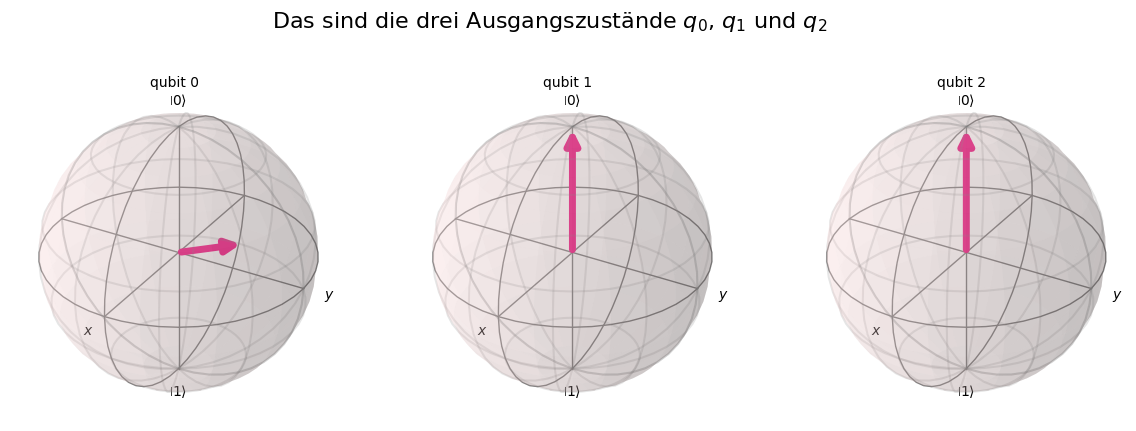

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi

qr = QuantumRegister(3, 'q')
crx= ClassicalRegister(1, 'cx')
crz= ClassicalRegister(1, 'cz')
circuit = QuantumCircuit(qr, crx, crz)
circuit.u(pi / 3, pi / 3, 0, 0)
circuit.barrier()
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, backend).result()
plot_bloch_multivector(job.get_statevector(circuit), title="Das sind die drei Ausgangszustände $q_0$, $q_1$ und $q_2$")

Qubit $q_0$ ist jetzt in den zu teleportierenden Anfangszustand versetzt. Das Ziel ist es, diesen Zustand von $q_0$ auf $q_2$ zu übertragen. Dazu müssen zunächst die beiden Qubits $q_1$ und $q_2$ miteinander verschränkt werden:

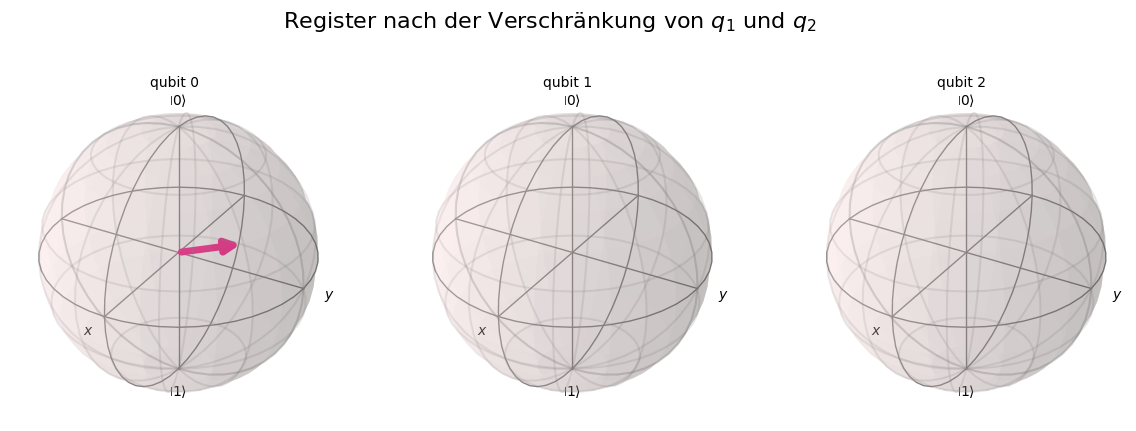

In [2]:
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()
job = execute(circuit, backend).result()
plot_bloch_multivector(job.get_statevector(circuit), title="Register nach der Verschränkung von $q_1$ und $q_2$")

Das Qubit $q_0$ bleibt davon unberührt. Die Qubits $q_1$ und $q_2$ sind jetzt miteinander verschränkt, deshalb können Sie nicht mehr mit eigenständigen Zustandsvektoren mit `plot_bloch_multivector` dargestellt werden. Nun erfolgt die Bellmessung der beiden Qubits $q_0$ und $q_1$. Dabei entspricht das `cx`-Gate dem $CNOT$. Neu ist die `c_if`-Anweisung, die aufgrund des Messergebnisses die bedingten `x`- und `z`-Anweisungen für Qubit `q_2` bestimmt.  Näheres zu der `c_if`-Instruktion finden sie unter folgendem Link: [C_if Instruktion](https://quantumcomputing.stackexchange.com/questions/28010/how-does-the-c-if-instruction-work-in-qiskit).

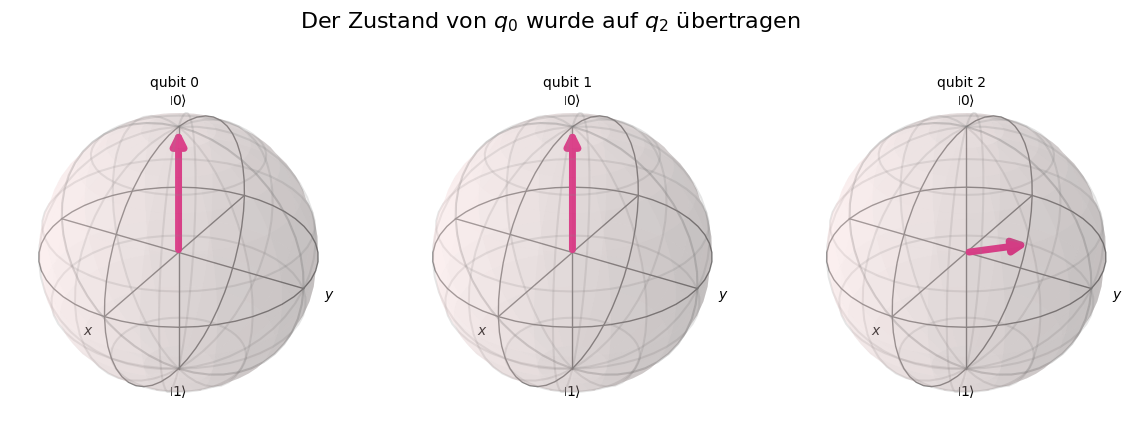

In [3]:
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure(0, crz)
circuit.measure(1, crx)
circuit.barrier()
circuit.x(2).c_if(crx, 1)
circuit.z(2).c_if(crz, 1)
job = execute(circuit, backend).result()
plot_bloch_multivector(job.get_statevector(circuit), title="Der Zustand von $q_0$ wurde auf $q_2$ übertragen")

Tatsächlich ist der Zustand von $q_0$ auf $q_2$ übergegangen. Das ist deutlich erkennbar. Die beiden Qubits $q_0$ und $q_1$ befinden sich nun in einem der vier möglichen Zustände $|00\rangle$, $|01\rangle$, $|10\rangle$ oder $|11\rangle$ entsprechend dem Ergebnis der Bell-Messung.

Führen Sie das ganze Notebook mehrmals aus. Sie werden dabei feststellen, dass sich die beiden Qubits $q_0$ und $q_1$ jeweils in einer anderen Konstellation  befinden. Das ist Ausdruck der Tatsache, dass das Messergebnis eben rein zufällig ist.

Schliesslich lassen wir den Schaltkreis von **MatPlotLib** wieder schön aufzeichnen:

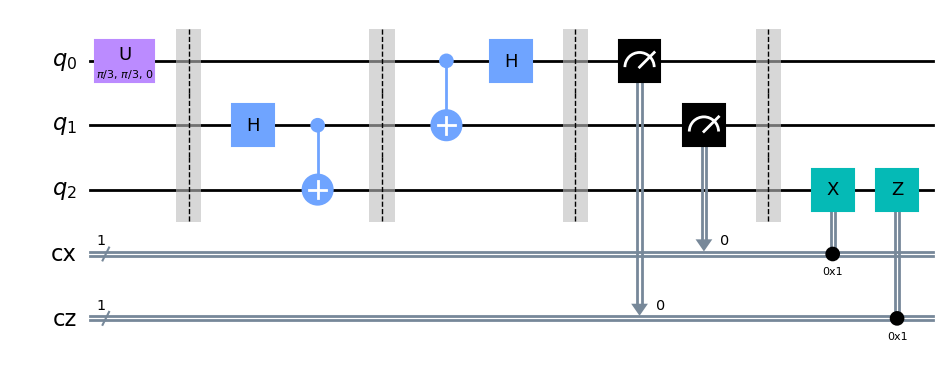

In [4]:
circuit.draw('mpl')

Vergleichen Sie dazu auch mit Kapitel 18.2 (S. 200) und 20.1 (S. 239) im Buch.

**Experimentieren Sie weiter**, indem Sie z. B. andere Anfangszustände für $q_0$ wählen!